In [1]:
!pip install tensorflow

In [2]:
# prompt: mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
import os
import pickle
import numpy as np
from PIL import Image

# Specify the script of interest
script_of_interest = "Telugu"

# Provide the path to the pickle file
file_name = '/content/drive/MyDrive/UHIndicPCwS.pkl'

# Directory to save the dataset
dataset_dir = "telugu_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Open the pickle file and load the data
with open(file_name, "rb") as pickle_out:
    lang_data = pickle.load(pickle_out)

# Retrieve the images and class labels for the specified script
for key, val in lang_data.items():
    if key == script_of_interest:
        image_data = val[0]  # Images as a list of numpy arrays
        classlabel_data = val[1]  # Class labels of the images
        print("Number of images:", len(image_data))
        print("Class labels:", classlabel_data)

        # Save each image to the dataset directory
        for i, img_array in enumerate(image_data):
            # Convert numpy array to PIL Image
            img = Image.fromarray(np.uint8(img_array * 255))  # Assuming the image arrays are normalized

            # Create a subdirectory for each class label
            label = classlabel_data[i]
            label_dir = os.path.join(dataset_dir, label)
            os.makedirs(label_dir, exist_ok=True)

            # Save the image with a unique filename
            img_filename = os.path.join(label_dir, f"{label}_{i}.png")
            img.save(img_filename)
        break

print(f"Dataset saved successfully in '{dataset_dir}' directory.")


Number of images: 38915
Class labels: ['Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_249', 'Telugu_2

In [32]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load images and labels from dataset directory
def load_dataset(dataset_path):
    images = []
    labels = []
    # Iterate over subdirectories (character classes)
    for label_dir in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label_dir)
        if os.path.isdir(label_path): # Check if it's a directory
            # Extract label from directory name (assuming format like 'Telugu_184')
            label = int(label_dir.split('_')[1])  # Extract numeric part after '_'

            # Iterate over images in each subdirectory
            for filename in os.listdir(label_path):
                if filename.endswith('.png'):
                    # Load image
                    image_path = os.path.join(label_path, filename) # Construct full image path
                    image = Image.open(image_path).convert('L')  # Convert to grayscale
                    image = image.resize((28, 28))  # Resize to MNIST dataset size (28x28)
                    image = np.array(image)  # Convert to numpy array
                    images.append(image)

                    labels.append(label)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Directory containing extracted character images
dataset_path = '/content/telugu_dataset' # Verify this path is correct

# Load dataset
images, labels = load_dataset(dataset_path)

# Normalize pixel values to range [0, 1]
images = images / 255.0

# Reshape images to (num_samples, height, width, channels)
images = images.reshape(-1, 28, 28, 1)  # Adding an extra dimension for grayscale channel

# Split dataset into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(images, labels, test_size=0.3, random_state=42)

# Summarize the shape of the dataset
print("Train:", train_x.shape, train_y.shape)
print("Test:", test_x.shape, test_y.shape)

# Example: Converting labels to categorical if needed (depends on your model setup)
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
print("Train categorical:", train_y.shape)
print("Test categorical:", test_y.shape)

Train: (27240, 28, 28, 1) (27240,)
Test: (11675, 28, 28, 1) (11675,)
Train categorical: (27240, 397)
Test categorical: (11675, 397)


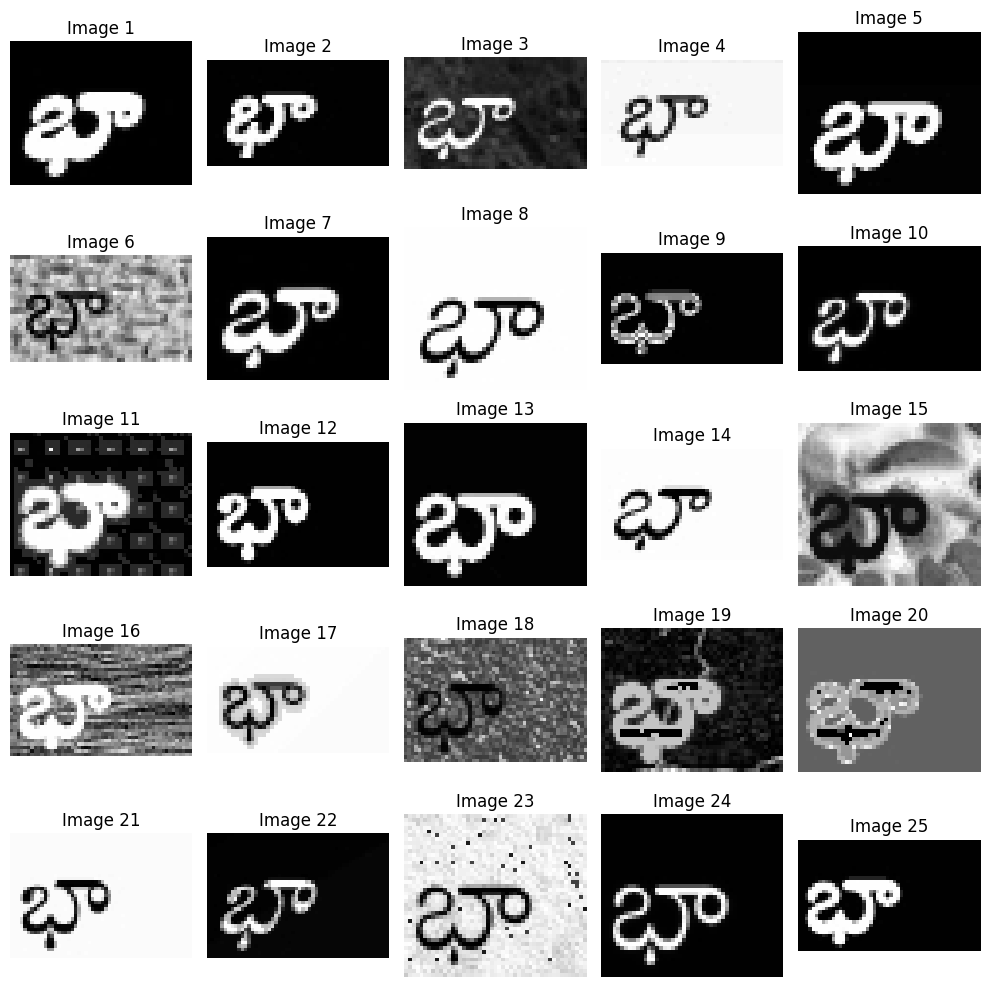

In [33]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to load images and labels from dataset directory
def load_custom_dataset(dataset_path):
    images = []
    for root, _, files in os.walk(dataset_path): # Use os.walk to traverse subdirectories
        for filename in files:
            if filename.endswith('.png'):
                # Load image
                image_path = os.path.join(root, filename) # Construct full image path
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                images.append(image)

    return images

# Directory containing extracted character images
dataset_path = '/content/telugu_dataset' # Make sure this path is correct

# Load custom dataset
images = load_custom_dataset(dataset_path)

# Check if images were loaded
if images:
    # Plot 25 images from the custom dataset in a 5x5 grid
    plt.figure(figsize=(10, 10))  # Set figure size to accommodate 5x5 grid nicely

    num_images_to_plot = min(25, len(images)) # Plot up to 25 images or the number of available images
    for i in range(num_images_to_plot):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')  # Plot image in grayscale
        plt.axis('off')  # Turn off axis ticks
        plt.title(f'Image {i+1}')  # Show image index as title

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()
else:
    print("No PNG images found in the specified directory.")

**MNISt dataset to train the generator and the discriminator unique handwritten digits resembling the mnist dataset
** **bold text**

In [34]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from tensorflow.keras import layers
import time
import tensorflow as tf
from IPython import display
#glob: File pattern matching.
#imageio: Reading and writing image files.
#matplotlib.pyplot: Creating visualizations.
#numpy: Scientific computing and array operations.
#os: Operating system interactions.
#PIL.Image: Image processing.
#tensorflow.keras.layers: Building neural network models.
#time: Time-related functions.
#tensorflow: Machine learning framework.
#IPython.display: Displaying rich media in notebooks.


In [35]:
import os
import numpy as np
from PIL import Image

# Function to load images and labels from dataset directory
def load_custom_dataset(dataset_path):
    images = []
    for root, _, files in os.walk(dataset_path): # Use os.walk to traverse subdirectories
        for filename in files:
            if filename.endswith('.png'):
                # Load image
                image_path = os.path.join(root, filename) # Construct full image path
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                images.append(image)

    return images # The function was only returning a single list

# Directory containing extracted character images
dataset_path = '/content/telugu_dataset'

# Load custom dataset
train_images = load_custom_dataset(dataset_path) # Changed to unpack a single value

# Check the shape of loaded data
print("Train images shape:", len(train_images)) # Use len() to check the number of images
# Removed the line printing "Train labels shape" as the function doesn't return labels

Train images shape: 38915


In [36]:
import numpy as np

# Convert list of PIL Images to NumPy array, ensuring consistent shapes
train_images_np = []
for img in train_images:
    img_np = np.array(img.resize((28, 28)))  # Resize all images to 128x128
    train_images_np.append(img_np)

train_images = np.array(train_images_np)  # Now create the NumPy array

# Now you can reshape and normalize
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [37]:
BUFFER_SIZE=60000
BATCH_SIZE=64

In [38]:
#batch and shuffle the data
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [40]:
# Dense layer with input shape specified correctly
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))#low resolution
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

# Reshape layer
  model.add(layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256)  # (None is the batch size)

# First Conv2DTranspose layer
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

# Second Conv2DTranspose layer
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

# Third Conv2DTranspose layer
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 28, 28, 1)

  return model



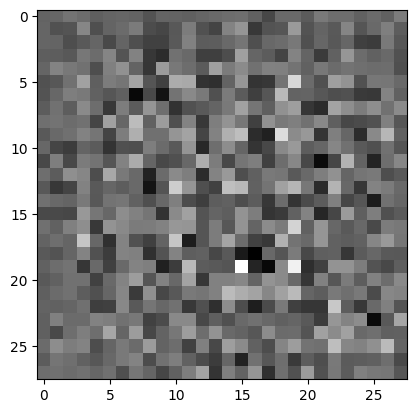

In [41]:
#using generator to create image
generator=make_generator_model()
noise=tf.random.normal([1,100])
generated_image=generator(noise,training=False)
plt.imshow(generated_image[0,:, :,0],cmap='gray')


**THE DISCRIMINATOR**

In [42]:
# Input to discriminator = 28*28*1   grayscale image
# Output  binary prediction (image is real (class=1) or fake (class=0))
# no pooling layers
# single node in the output layer with the sigmoid activation function to predict whether the input sample is real or fake.
# Downsampling from 28×28 to 14×14, then to 7×7, before the model makes an output prediction
def make_discriminator_model():
  model=tf.keras.Sequential()

  model.add(layers.Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=[28,28,1]))#2x2 downsample
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128,(5,5),strides=(2,2),padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1,activation='sigmoid'))

  return model




**Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.**

In [43]:
discriminator=make_discriminator_model()
decision=discriminator(generated_image)
print(decision)

tf.Tensor([[0.49958733]], shape=(1, 1), dtype=float32)


**Define the loss optimizer**

In [44]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

**Discriminator losst**

In [45]:
# def discriminator_loss(real_output,fake_output):
#   real_loss=cross_entropy(tf.ones_like(real_output),real_output)
#   fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
#   total_loss=real_loss+fake_loss
#   retutn total_loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

**Generator loass**

In [46]:
# def generator_loss(fake_output):
#   return cross_entropy(tf.ones_like(fake_output),fake_output)
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

**The discriminator and the generator optimiziers **

In [47]:
generator_optimizer=tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer=tf.keras.optimizers.Adam(1e-4)

**save checkpoints**

In [48]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# Define the optimizers (assuming they are Adam optimizers)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define the checkpoint object
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

**define the training loop**

In [51]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [52]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [53]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**generate and save images**

In [54]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

**train the model**

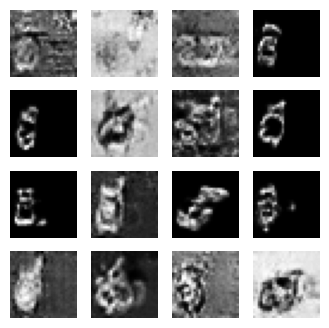

In [55]:
train(train_dataset, EPOCHS)

In [56]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [57]:
!pip install pillow

In [58]:
import PIL
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))


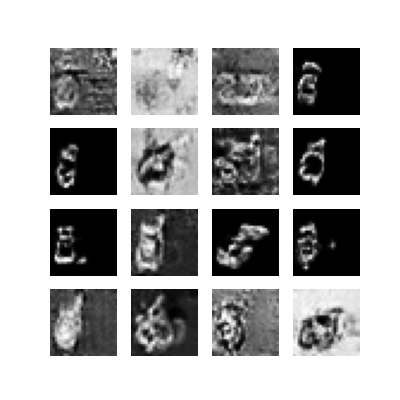

In [59]:
display_image(EPOCHS)

In [ ]:
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-3p0h8nhi
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-3p0h8nhi
  Resolved https://github.com/tensorflow/docs to commit 75b2672b5bed8ca0995663536db84bd9a39b8896
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.31743-py3-none-any.whl size=182531 sha256=ccf3ce653fc6ef8c7960da75834f707b1151f36345c5d55a1d54fb105632a675
  Stored in directory: /tmp/pip-ephem-wheel-cache-9l2s4vn5/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


NameError: name 'anim_file' is not defined